### Student Name: Aidan Keeshan
### Student ID: 18200117

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns

## Import CSV

In [119]:
df = pd.read_csv("bank_et2.csv",index_col=['Unnamed: 0'])
"|".join(df.columns.values)

'age|job|marital|education|default|balance|ratio_bal_ln|ratio_ln_inc|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|subscribed'

### Top 5 Records

In [5]:
df.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


### Task 1 (CS5062)

I have listed all fields which have nulls in them. I have not considered zero as null for this analysis,   
As not 100% clear which is the best approach, I have taken one value at this time to perform analysis on it (Age).  
To assess what is considered a better outcome I have taken the target variable subscribed and created 5 variation of age and used feature importance.    
As there will be massive collinearity between these values the outputs are largely irrelevant.    
I am assuming the largest one can best explain the variation in the target variable.    
In this case would show replace the average of age by marital status. 

In [16]:
df_null = df.isnull().sum()
df_null = pd.DataFrame({'VARNAME' : df_null.index.values, 'VARNULL': df_null.reset_index(drop=True)}).sort_values(by=['VARNULL'], ascending=False)
print (df_null[df_null['VARNULL'] != 0] )

      VARNAME  VARNULL
17   poutcome      454
10    contact      191
3   education      104
0         age       12
1         job       10


In [114]:
table = df.pivot_table(values='age',columns='marital',aggfunc=np.median)
print(table)

marital  divorced  married  single
age          46.0     44.0    31.0


In [113]:
from sklearn.ensemble import ExtraTreesClassifier

y = df['subscribed'].map(dict(yes=1, no=0))
X = df[['age']]

X['age_by_marital'] = df['age'].fillna(df.groupby('marital')['age'].transform('mean'))
X['age_by_job'] = df['age'].fillna(df.groupby('job')['age'].transform('mean'))
X['age_by_education'] = df['age'].fillna(df.groupby('education')['age'].transform('mean'))

X['age_mean'] = X['age'].fillna(X['age'].mean())
X['age_zero'] = X['age'].fillna(0)

X = X.drop(['age'], axis=1)

model = ExtraTreesClassifier()
model.fit(X, y)
fet_imp = model.feature_importances_

fet_imp = pd.DataFrame({'TRANSFORM':X.columns.values,'FEATURE_IMPORTANCE':fet_imp})
fet_imp

,TRANSFORM,FEATURE_IMPORTANCE
0,age_by_marital,0.268751
1,age_by_job,0.240254
2,age_by_education,0.184155
3,age_mean,0.145444
4,age_zero,0.161395


### Task 2 (CS5062) + Task 3 (CS5062)
More work required

In [120]:
df['balance_sign'] = np.sign(df['balance'])
df['balance_log'] = np.log(np.abs(df['balance']+.00001))

### Task 4 (CE6002)
As data not fully prepared only working on subset currently

In [72]:
def run_log_reg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    print ("Train Score: {:.2%}".format(clf.score(X_train, y_train)))
    print ("Test Score: {:.2%}".format(clf.score(X_test, y_test)))

In [73]:
col_cont = ["age","balance","ratio_bal_ln","ratio_ln_inc"]
X = df[col_cont]
X['age'].fillna(X['age'].mean(), inplace=True)
y = df['subscribed'].map(dict(yes=1, no=0))
run_log_reg(X,y)

Train Score: 77.93%
Test Score: 81.00%


In [115]:
col_cont = ["age","balance","ratio_bal_ln","ratio_ln_inc"]
X = df[col_cont]
X['age'] = df['age'].fillna(df.groupby('marital')['age'].transform('mean'))
y = df['subscribed'].map(dict(yes=1, no=0))
run_log_reg(X,y)

Train Score: 77.93%
Test Score: 81.33%


In [118]:
col_cont = ["age","balance_sign","balance_log","ratio_bal_ln","ratio_ln_inc"]
X = df[col_cont]
X['age'].fillna(X['age'].mean(), inplace=True)
y = df['subscribed'].map(dict(yes=1, no=0))
run_log_reg(X,y)

Train Score: 77.93%
Test Score: 81.17%


### Task 5 (CE6002)
Sample code taken form sklearn website

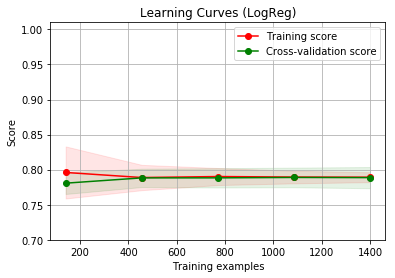

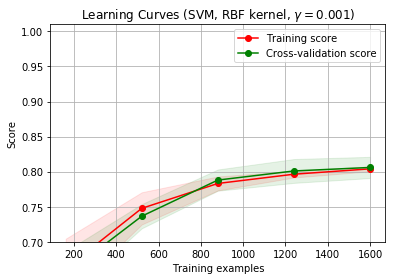

In [121]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (LogReg)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=42)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=8)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
#SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()